Importing necessary libraries

In [2]:
import numpy 
import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the Data

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

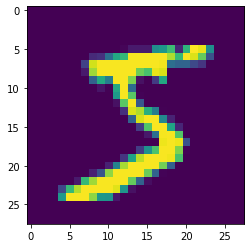

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Reshaping the data

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

Applying one hot encoding

In [9]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model Building

Add CNN layer

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(number_of_classes, activation='softmax'))

Compiling the model

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Fitting the model

In [17]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.2374 - accuracy: 0.9497 - val_loss: 0.0958 - val_accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 160s 86ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0905 - val_accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0752 - val_accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0853 - val_accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0959 - val_accuracy: 0.9789


Observing the metrics

In [18]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.09588762372732162, 0.9789000153541565]


Predicting the output

In [19]:
prediction=model.predict(X_test[:4])
print(prediction)

[[9.0093910e-10 2.6393176e-14 2.2804696e-10 8.9481937e-08 4.6258049e-15
  6.0542191e-13 2.6089455e-15 9.9999988e-01 4.8692703e-09 1.0207722e-11]
 [3.4028145e-09 5.4877171e-12 1.0000000e+00 1.5466675e-10 6.1942903e-14
  1.7141961e-15 6.0420247e-10 5.9792564e-14 1.4880339e-14 2.3225573e-18]
 [1.2325194e-07 9.9983346e-01 2.9755078e-05 1.8629086e-10 3.7832476e-06
  6.5191452e-05 9.3422550e-08 5.7213032e-07 6.6950270e-05 3.5124368e-09]
 [9.9999928e-01 3.7385957e-14 8.6772239e-10 1.4813322e-11 3.6781958e-12
  1.8780880e-11 5.3923634e-07 6.4289400e-13 1.1990912e-07 1.6438589e-08]]


In [20]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Saving the model

In [21]:
model.save("mnistCNN.h5")

In [22]:
#compress the files #zipping the file
!tar -zcvf digi-recognition-model.tgz mnistCNN.h5

mnistCNN.h5


IBM Deployment

In [23]:
!pip install ibm_watson_machine_learning

In [24]:
from ibm_watson_machine_learning import APIClient

In [25]:
wml_credentials = {
    "url":"https://eu-de.ml.cloud.ibm.com",
    "apikey":"ZMVtrQvNt9LxmyahJCiCFh6fShcnP9qijruouq7vTeq-"
}

In [26]:
client = APIClient(wml_credentials)

In [27]:
client

In [28]:
client.spaces.list();

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
159b11d6-0521-46ef-bbfa-4fb5a96bb91a  Digits  2022-11-08T10:41:20.132Z
------------------------------------  ------  ------------------------


In [29]:
space_id = "159b11d6-0521-46ef-bbfa-4fb5a96bb91a"

In [30]:
client.set.default_space(space_id)

'SUCCESS'

In [31]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [32]:
software_space_uid = client.software_specifications.get_id_by_name("tensorflow_rt22.1-py3.9")

In [33]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model = 'digi-recognition-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"cnn digit model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [35]:
model_id = client.repository.get_model_id(model_details)

In [36]:
model_id

'370f2244-c922-4b31-8484-64a82f6c5d43'